In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving all-weeks-countries.csv to all-weeks-countries.csv


In [2]:
file_name = list(uploaded.keys())[0]
top10 = pd.read_csv(file_name)

top10 = pd.DataFrame(top10)

top10.info()
top10.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112300 entries, 0 to 112299
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   country_name                112300 non-null  object
 1   country_iso2                112300 non-null  object
 2   week                        112300 non-null  object
 3   category                    112300 non-null  object
 4   weekly_rank                 112300 non-null  int64 
 5   show_title                  112300 non-null  object
 6   season_title                54668 non-null   object
 7   cumulative_weeks_in_top_10  112300 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.9+ MB


,weekly_rank,cumulative_weeks_in_top_10
count,112300.000000,112300.000000
mean,5.500000,3.468281
std,2.872294,5.518189
min,1.000000,1.000000
25%,3.000000,1.000000
50%,5.500000,2.000000
75%,8.000000,3.000000
max,10.000000,60.000000


Text(0, 0.5, 'Frequency')

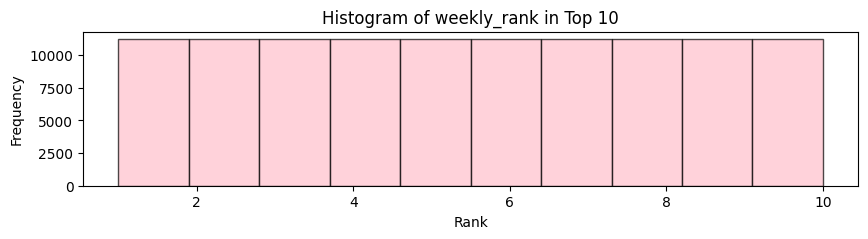

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
plt.hist(top10['weekly_rank'], bins=10, edgecolor='black', alpha=0.7, color='pink')
plt.title('Histogram of weekly_rank in Top 10')
plt.xlabel('Rank')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

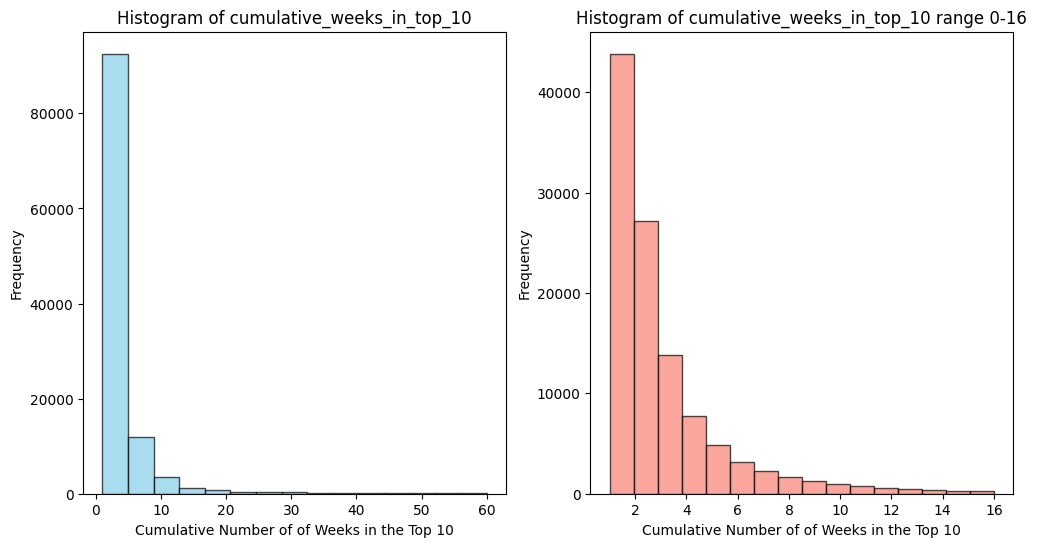

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].hist(top10['cumulative_weeks_in_top_10'], bins=15, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Histogram of cumulative_weeks_in_top_10')
axes[0].set_xlabel('Cumulative Number of of Weeks in the Top 10')
axes[0].set_ylabel('Frequency')

axes[1].hist(top10['cumulative_weeks_in_top_10'], bins=16, range=(1, 16), edgecolor='black', alpha=0.7, color='salmon')
axes[1].set_title('Histogram of cumulative_weeks_in_top_10 range 0-16')
axes[1].set_xlabel('Cumulative Number of of Weeks in the Top 10')
axes[1].set_ylabel('Frequency')


<ipython-input-5-4c8b6dacff89>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = top10.var()


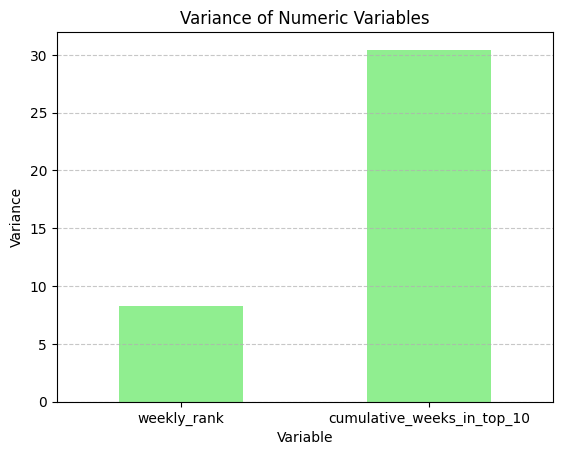

In [5]:
variances = top10.var()

variances.plot(kind='bar', color='lightgreen')
plt.title('Variance of Numeric Variables')
plt.xlabel('Variable')
plt.ylabel('Variance')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

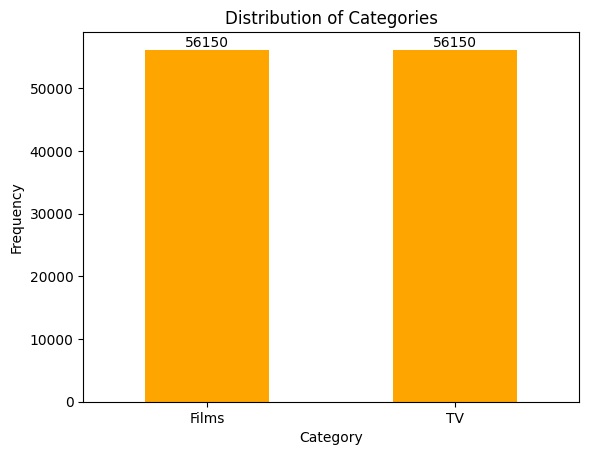

In [6]:
category_counts = top10['category'].value_counts()
category_counts.plot(kind='bar', color='orange')

for i, count in enumerate(category_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

94


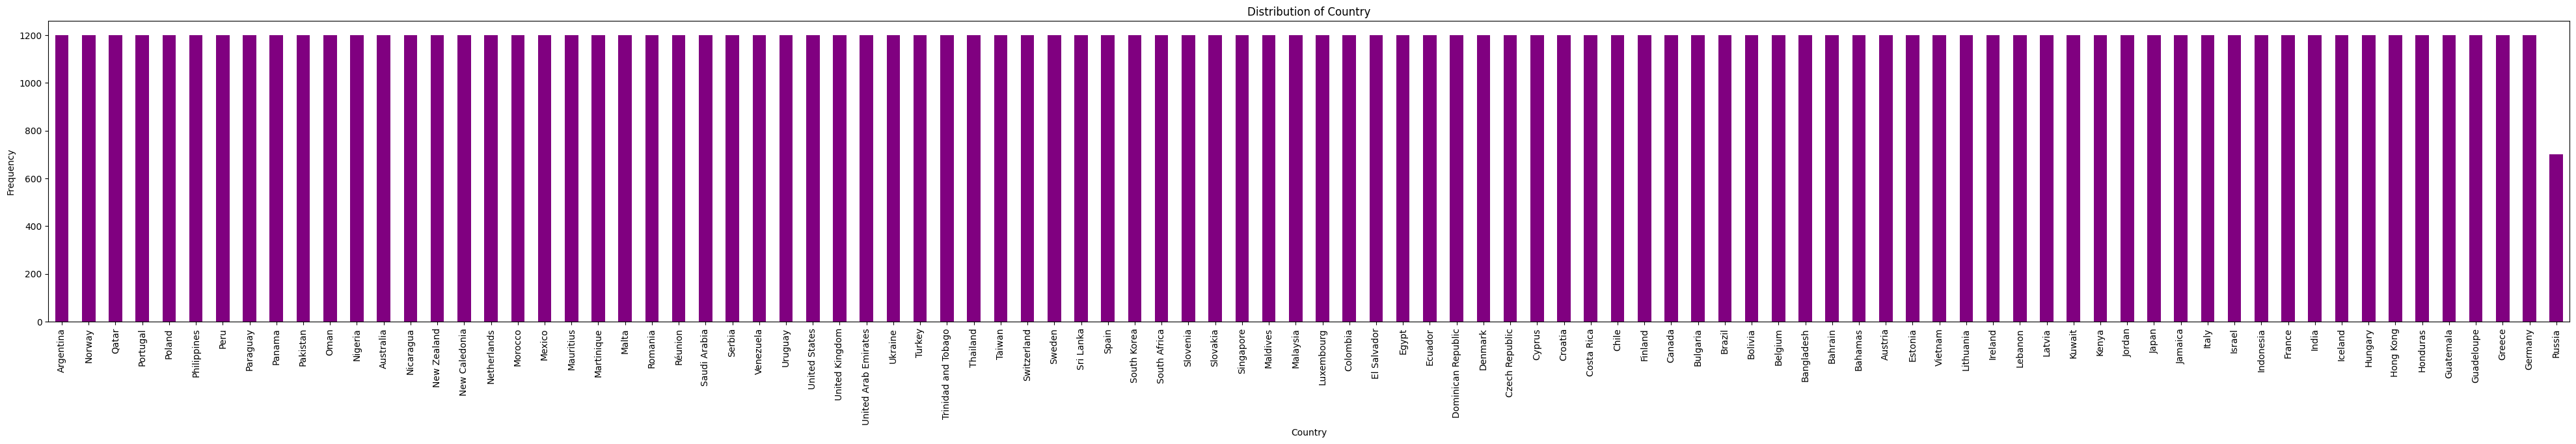

In [39]:
plt.figure(figsize=(50, 6))
top10['country_name'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')

print(top10['country_name'].nunique())

plt.title('Distribution of Country')
plt.xticks(rotation=90)
plt.show()

In [8]:
import seaborn as sns

spearman_corr = top10[['weekly_rank', 'cumulative_weeks_in_top_10']].corr(method='spearman')
print(spearman_corr)

                            weekly_rank  cumulative_weeks_in_top_10
weekly_rank                    1.000000                    0.028064
cumulative_weeks_in_top_10     0.028064                    1.000000


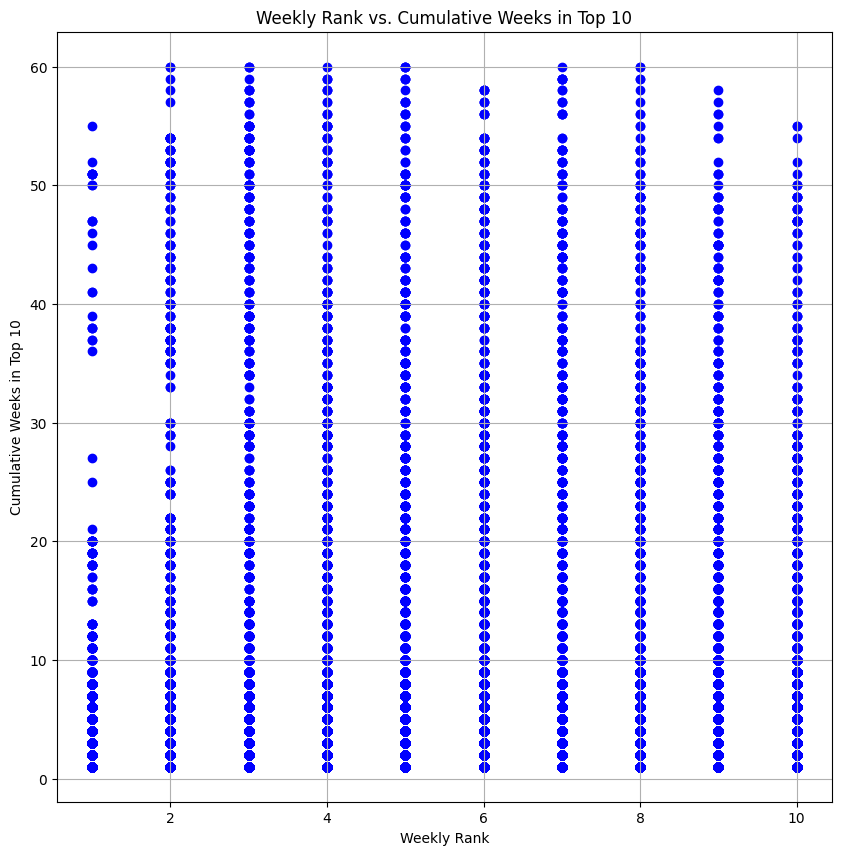

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(top10['weekly_rank'], top10['cumulative_weeks_in_top_10'], color='blue')
plt.title('Weekly Rank vs. Cumulative Weeks in Top 10')
plt.xlabel('Weekly Rank')
plt.ylabel('Cumulative Weeks in Top 10')
plt.grid(True)
plt.show()

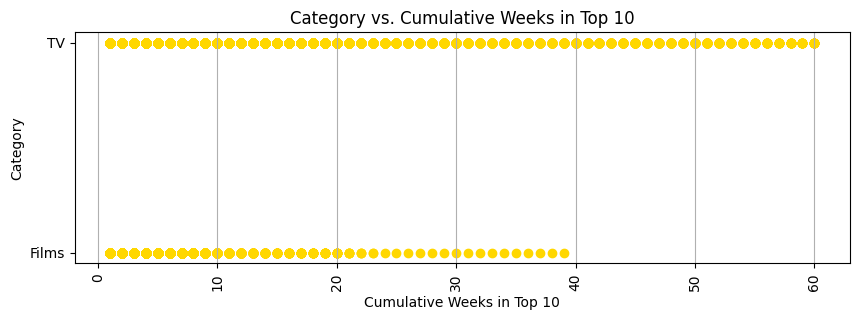

In [24]:
plt.figure(figsize=(10, 3))
plt.scatter(top10['cumulative_weeks_in_top_10'], top10['category'], color='gold')
plt.xlabel('Cumulative Weeks in Top 10')
plt.ylabel('Category')
plt.title('Category vs. Cumulative Weeks in Top 10')
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.show()

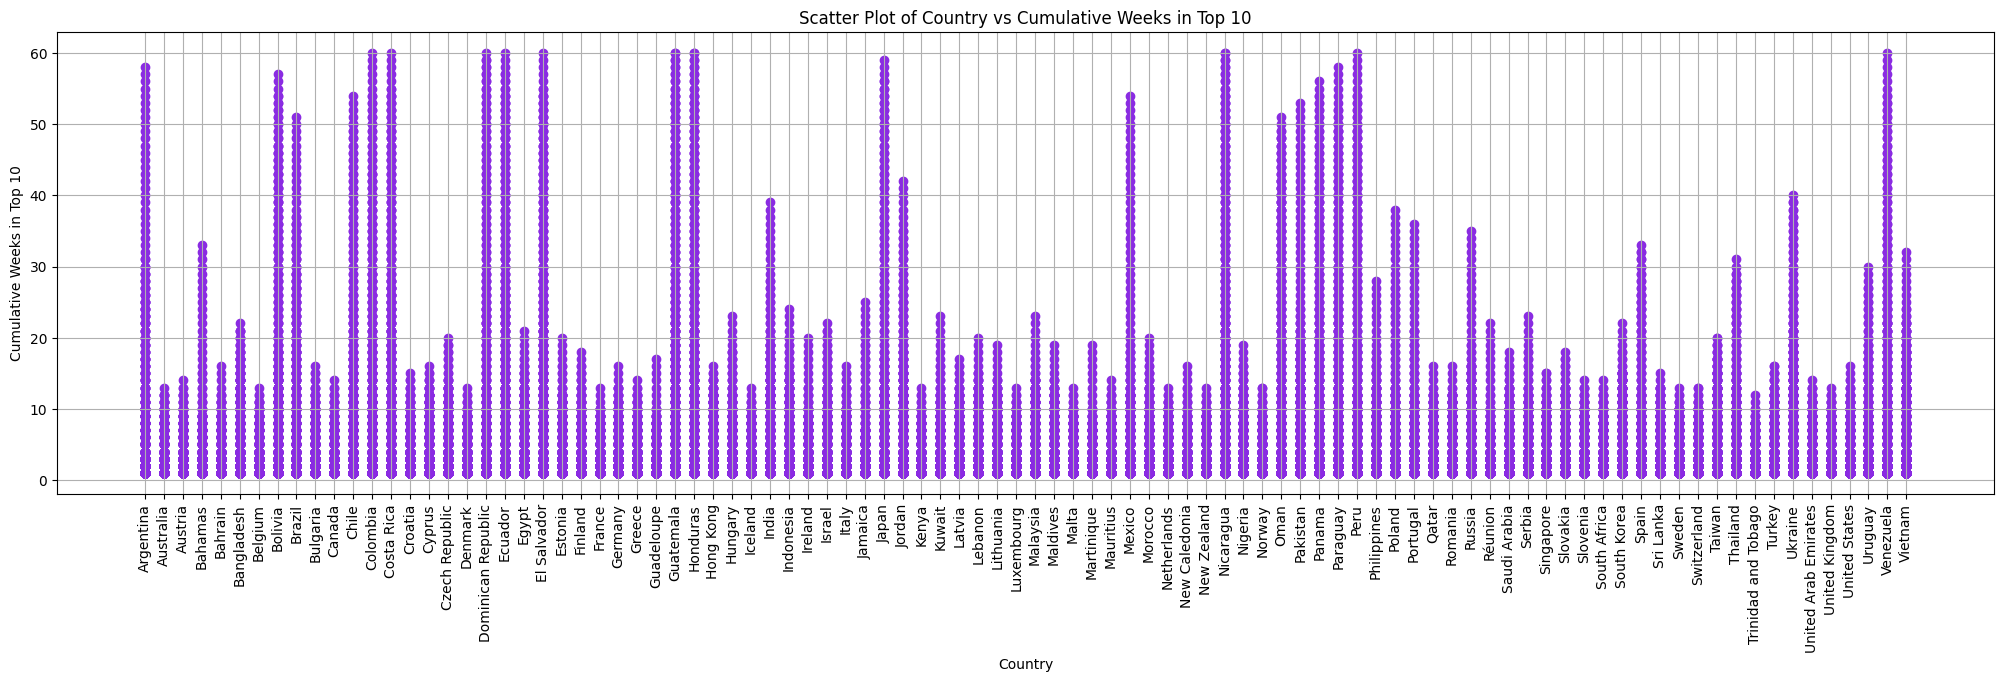

In [38]:
plt.figure(figsize=(25, 6))
plt.scatter(top10['country_name'], top10['cumulative_weeks_in_top_10'], color='blueviolet')
plt.xlabel('Country')
plt.ylabel('Cumulative Weeks in Top 10')
plt.title('Scatter Plot of Country vs Cumulative Weeks in Top 10')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()